![alt text](https://storage.googleapis.com/pr-newsroom-wp/1/2018/11/Spotify_Logo_CMYK_Green.png)

## Comparing Supervised & Unsupervised Learning Methods to Identify Songs for Spotify Playlists
-Jeremy Seibert

Spotify is an amazing music streaming service that touches over 200 million customers. In this notebook we will be exploring the two playlists that I created on spotify,(i.e. songs that my fiance likes and songs that she doesnt like) with each consisting of different styles, sounds, and genres of music. The way that we will be exploring this is through data that was aggreagated using the awesome SpotiPy package which assists in the API connection to the Spotify backend's publicly available data. Once connected to the API, we can query an enormous amount of Spotify data related to their user, playlist, and song data. We will use this package to access the two aforementioned playlists' data to try and predict songs that my fiance will like, and want to add to her playlist. 


In [13]:
import pandas as pd

In [14]:
total_data = pd.read_csv('./Dataset/total_data.csv')
total_data.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence
0,0.08130,https://api.spotify.com/v1/audio-analysis/6KBO...,0.797,238379,0.880,6KBOvrddbomdb9dkarvwCl,0.000000,1,0.2720,-2.534,1,0.0400,1,144.925,4,https://api.spotify.com/v1/tracks/6KBOvrddbomd...,audio_features,spotify:track:6KBOvrddbomdb9dkarvwCl,0.779
1,0.00205,https://api.spotify.com/v1/audio-analysis/20Xw...,0.603,185753,0.972,20Xwgtz25c8XBV46z1GYs4,0.687000,11,0.1240,-5.013,0,0.0415,1,145.997,4,https://api.spotify.com/v1/tracks/20Xwgtz25c8X...,audio_features,spotify:track:20Xwgtz25c8XBV46z1GYs4,0.388
2,0.39500,https://api.spotify.com/v1/audio-analysis/18yc...,0.300,275307,0.452,18ycL9Q5zLDeY9M2Lr3Ozw,0.000818,11,0.1370,-9.298,1,0.0305,1,82.988,4,https://api.spotify.com/v1/tracks/18ycL9Q5zLDe...,audio_features,spotify:track:18ycL9Q5zLDeY9M2Lr3Ozw,0.342
3,0.16400,https://api.spotify.com/v1/audio-analysis/48os...,0.643,234786,0.798,48osCmpz6cmeBdmkDQg35z,0.000000,4,0.2960,-5.070,0,0.0750,1,92.160,4,https://api.spotify.com/v1/tracks/48osCmpz6cme...,audio_features,spotify:track:48osCmpz6cmeBdmkDQg35z,0.459
4,0.58100,https://api.spotify.com/v1/audio-analysis/0FE9...,0.825,233713,0.652,0FE9t6xYkqWXU2ahLh6D8X,0.000000,1,0.0931,-3.183,0,0.0802,1,95.977,4,https://api.spotify.com/v1/tracks/0FE9t6xYkqWX...,audio_features,spotify:track:0FE9t6xYkqWXU2ahLh6D8X,0.931


## 3. Visual EDA

In [15]:
train_features = total_data.drop(columns=['analysis_url','id','track_href','type','uri','target'],axis=1)
labels = total_data['target']
corr_metrics = train_features.corr()
corr_metrics.style.background_gradient()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
acousticness,1,0.0382689,-0.0386362,-0.486035,-0.0932612,-0.00623727,-0.157073,-0.360812,-0.00929706,-0.00459823,-0.0356324,-0.0832044,0.0195209
danceability,0.0382689,1,-0.117562,-0.0842935,0.0451921,-0.050214,-0.1423,-0.0375472,-0.0768521,0.139093,-0.197254,0.154409,0.283443
duration_ms,-0.0386362,-0.117562,1,-0.117066,0.164704,0.0127384,0.0787012,-0.240825,-0.0336298,0.0507786,-0.0110348,-0.121242,-0.0830972
energy,-0.486035,-0.0842935,-0.117066,1,0.0356708,-0.00533067,0.18826,0.651284,-0.0861466,-0.0332559,0.0556369,0.158184,0.32434
instrumentalness,-0.0932612,0.0451921,0.164704,0.0356708,1,0.0206084,0.0500363,-0.0767438,-0.0475441,-0.054263,0.02256,0.0262307,-0.0337952
key,-0.00623727,-0.050214,0.0127384,-0.00533067,0.0206084,1,0.0225284,0.0142517,-0.0954232,0.0509167,0.117948,-0.0432769,-0.019178
liveness,-0.157073,-0.1423,0.0787012,0.18826,0.0500363,0.0225284,1,0.108759,-0.0226736,0.0886166,0.0848656,-0.0238287,0.0127842
loudness,-0.360812,-0.0375472,-0.240825,0.651284,-0.0767438,0.0142517,0.108759,1,-0.096241,-0.020977,-0.0281062,0.0915854,0.123628
mode,-0.00929706,-0.0768521,-0.0336298,-0.0861466,-0.0475441,-0.0954232,-0.0226736,-0.096241,1,-0.125585,-0.0753331,-0.0289954,-0.0287152
speechiness,-0.00459823,0.139093,0.0507786,-0.0332559,-0.054263,0.0509167,0.0886166,-0.020977,-0.125585,1,0.0819651,0.0829475,0.0520174


## 4. Import Pre-Processing Components

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 5. Scale and Run Principle Component Analysis

Text(0.5, 0, 'Principal Component #')

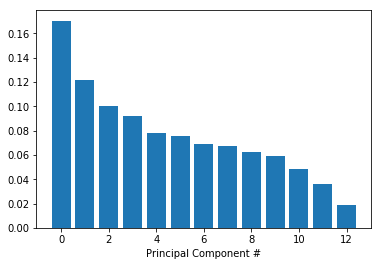

In [17]:
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')

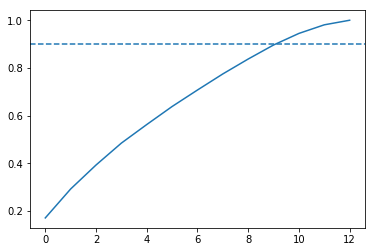

In [18]:
# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 90%
fig, ax = plt.subplots()
ax.plot(range(13),cum_exp_variance)
ax.axhline(y=0.9, linestyle='--')

In [19]:
#The first 9 Principle Components explain 90% of the variance
n_components = 9

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_features)
pca_projection = pca.transform(scaled_train_features)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Create the classification report for both models
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)
class_rep_log = classification_report(test_labels, pred_labels_logit)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

In [ ]:
# Subset only the bad songs
not_only = total_data.loc[total_data["target"] == 0]

# sample the Good songs to be the same number as there are in the bad songs
like_only = total_data.loc[total_data["target"] == 1].sample(len(not_only), random_state=10)

# concatenate the dataframes good and bad
not_like_bal = pd.concat([not_only, like_only])

# The features, labels, and pca projection are created for the balanced dataframe
track_features = not_like_bal.drop(columns=['analysis_url','id','track_href','type','uri','target'],axis=1)
labels = not_like_bal['target']
pca_projection = pca.fit_transform(scaler.fit_transform(track_features))

# Redefine the train and test set with the pca_projection from the balanced data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, labels, random_state=10)

In [ ]:
# Train our decision tree on the balanced data
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
pred_labels_tree = tree.predict(test_features)

# Train our logistic regression on the balanced data
logreg = LogisticRegression(random_state=10)
logreg.fit(train_features, train_labels)
pred_labels_logit = logreg.predict(test_features)

# Train our KNeighbors on the balanced data
knn = KNeighborsClassifier(3)
knn.fit(train_features, train_labels)
knn_pred = knn.predict(test_features)

# Compare the models
print("Decision Tree: \n", classification_report(test_labels, pred_labels_tree))
print("Logistic Regression: \n", classification_report(test_labels, pred_labels_logit))
print("KNN: \n", classification_report(test_labels, knn_pred))

In [ ]:
# Set up our K-fold cross-validation
kf = KFold(n_splits=10, random_state=10)

tree = DecisionTreeClassifier(random_state=10)
logreg = LogisticRegression(random_state=10)
knn = KNeighborsClassifier(3)

# Train our models using KFold cv
tree_score = cross_val_score(tree, pca_projection, labels, cv=kf)
logit_score = cross_val_score(logreg, pca_projection, labels, cv=kf)
knn_score = cross_val_score(knn, pca_projection, labels, cv=kf)

# Print the mean of each array of scores
print("Decision Tree:", np.mean(tree_score), "Logistic Regression:", np.mean(logit_score), "KNN:", np.mean(knn_score))